## Financial Engineering 2 : Options Pricing Project

Group Members: 
- Eric Shi (ejx.shi@mail.utoronto.ca) 
- Jim Zhao (jim.zhao@mail.utoronto.ca)
- Luis Ayala Sanchez (luis.ayala@mail.utoronto.ca)
- Shreya Patki (s.patki@mail.utoronto.ca)

Note: This project has some aspects that follows the pseudo-code steps provided in "Pricing American Options using Monte Carlo Simulation" by Nairn McWilliams.

## Summary
This project covers two main methods to determine the pricing of options contracts; namely, Monte Carlo Simulation and the Binomial Lattice Approach. The focus was on 4 types of options, primarily, Asian, Lookback and Floating lookback, and American options. In all 4 option types, the call and put prices were assessed (American is assessed for put option only). These options are briefly described below:

- Asian Options:
These are a type of exotic option in which payoff depends on the average underlying stock price over the option lifetime rather than the underlying stock price at maturity for regular European options.

- Lookback options:
These options have a fixed strike price, but at maturity, the contract owner can look into the history of the underlying price action throughout the option lifetime and choose the most favorable price to exercise at.

- Floating lookback options:
These options have to be exercised at the stock price at maturity time, but the strike price can be set to the most favorable price that the underlying asset reached throughout the option lifetime.

- American Options:
American options are identical to the classical European options in every regard except they also have the ability to exercise prior to maturity. This makes the process for their valuation a bit more complicated than the options discussed above. 

In terms of pricing methods Monte Carlo simulation provides a more random method to allow for the incorporation of the random nature of the underlying stock price. This process is based on the geometric Brownian motion. This process was designed so that as time increments become infinitesimally small, Monte Carlo Simulation becomes a continuous simulation of stock price path. The binomial lattice approach is based on discrete methodologies to compute the price of the stock along various possible paths using risk neutral probabilities.


## Inputs
No dividend payments assumed.
1. Present stock price = 100 (100$)
    2. Risk-free rate = 0.02 (2%)
    3. Volatility = 0.25 (25%)
    4. Defined incremental time interval = 1 week (1/52 in years)
    5. Maturity of option: 2/12 (2 months)


## Pricing method for the options
 
Table is from the Pricing American Options Using Monte Carlo Simulation paper by Nairn McWilliams

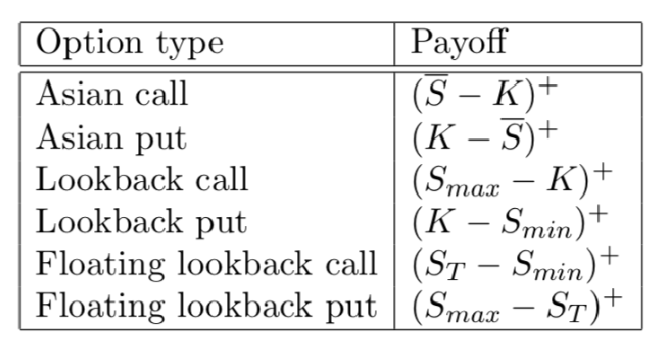

## Monte Carlo Method
The process of option pricing is done based on the price of the underlying asset. To price the underlying asset, in this case a stock, we utilize a process derived from the multiplicative model, called the geometric Brownian motion. When going from a discrete model like multiplicative model to continuous model like geometric Brownian Motion, Brownian Motion (which is based on the Wiener process) is used to convert the discrete model to continuous. Further conversion of the model is done with Ito's lemma to bring it to the formulation used in this case. This method uses the Wiener process as a basis for randomness.

The Monte Carlo Method is a method derived from utilizing the standard normal random variable eta (originally from the Wiener process)  in the formula for the stock price path. We can generate a different eta for each step to generate each stock price along the path. Essentially, this is taking on the Markovian assumption for the stock price (where future stock price only depends on current stock price and does not need to consider historical stock price), and assumes a random walk.

This whole model utilizes the risk free rate throughout the process (discounting, geometric Brownian motion etc.). This is possible due to the risk neutral assumption (assumption that the world is risk neutral i.e. investors don't care about risk).

How the process works:
  This method requires the following inputs:
   - 1. Present stock price
   - 2. Risk-free rate
   - 3. Volatility
   - 4. Defined incremental time interval (which makes it somewhat discrete in nature but is a part of the accepted error in the solution)
   - 5. Maturity of the option
    
It begins at the present and takes "random steps” which assumes a log-normal distribution that has a mean of (risk-free rate - volatility^2/2) multiplied by dt and a standard deviation of volatility multiplied by the square root of dt. The random steps each move forward by a time interval of dt until the maturity date of the option is reached. As dt approaches 0, the simulation becomes continuous. However, this project has a dt of 1 week, so the simulations were discrete (as mentioned before). Using these simulations for the underlying stock price, the option payoff is appropriately found and discounted accordingly to find the option price.

In the processes coded in this document, 1000 Monte Carlo Simulations (considering the project minimum of 250 simulations) (what are called 'paths') were created per option valuation to generate a large enough sample size to more accurately predict options pricing. The option price was taken as the arithmetic mean of the present value of the payoff at all paths.

Specifically for the American Put Option, an Optimal Exercise Boundary was generated using backwards induction in order to compute the pricing for the American Put Option. To do this, all price actions at all incremental time steps for all possible Monte Carlo paths were considered for early exercise, and how the resulting payoff would compare with exercising later in the future, perhaps at a more "optimal" time. 

The visualization for the methods are included in the appropriate section either Exotic or American. These help the understanding of the simulation process.


# Pricing Asian, Lookback, and Floating-Lookback Options using Monte Carlo Simulation

In [1]:
# Import libraries
import numpy as np
from scipy.stats import norm
from math import log, sqrt,exp
import matplotlib.pyplot as plt

First we have the inputs for the Monte Carlo simulation for the options

In [2]:
# Pricing a European option. 
# Assuming the cases are done in a risk netural world where risk free rate can be applied for calculation and pricing process.

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
sigma = 0.25  # volatility
r = 0.02     # risk-free rate
T = 2/12      # years to expiry


Here the pricing function has the initial conditions as inputs. The OPtype variable allows for the user to input the type of the option, so the proper payoff method will be used. 

First step is to calculate the price according to the underlying stock price which is dictated by the geometric Brownian motion (GBM). We are assuming a risk neutral world, and so the application of risk free rate in the GBM and the discounting process, is done accordingly. The double loop in the function goes through each step point (inner loop) for every path (outerloop)
After the underlying stock price is determined, we can calculate important properties of the path like average price, minimum and maximum price. These are utilized according to the type of option being priced. 
The discounting of this payoff of the path using the risk-free rate is done (with continuous discounting utilized). The average of all paths present value of the payoff determines the put and call value for the options.


The discounting of this payoff of the path using the risk-free rate is done (with continuous discounting utilized). The average of all paths present value of the payoff determines the put and call value for the options.


In [3]:
def OptionsPricing(S0, K, T, r, sigma, numSteps, numPaths,OPtype,graph):
  paths = np.zeros((numSteps + 1, numPaths))
  Smin=[]
  Smax=[]
  Savg=[]
  St=[]
  puts=[]
  calls=[]
  # dT is the time increment (in years)
  dT = T / numSteps
  
  # Vector of paths will store realizations of the asset price
  # First asset price is the initial price
  paths[0] = [S0] * numPaths

  # Generate paths
  for iPath in range(numPaths): #This is n 
      for iStep in range(numSteps): #this is m
          paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((r - 0.5 * sigma ** 2) * dT 
                                                                  + sigma * np.sqrt(dT) * np.random.normal(0,1))
      #Find the values for the path
      Smin.append(np.min(paths[:,iPath],axis=0)) #max stock price in the path
      Smax.append(np.max(paths[:,iPath],axis=0)) #minimum stock price in the path
      Savg.append(np.mean(paths[:,iPath],axis=0)) #mean stock price of the path
      St.append(paths[numSteps,iPath]) #stock price at maturity
      if OPtype==1: #Asian
        PutPayoffT = np.maximum(K - Savg[-1], 0)
        CallPayoffT = np.maximum(Savg[-1] - K, 0)
      if OPtype==2: #Lookback
        PutPayoffT = np.maximum(K - Smin[-1], 0)
        CallPayoffT = np.maximum(Smax[-1] - K, 0)
      if OPtype==3: #Floating lookback 
        PutPayoffT = np.maximum(Smax[-1] - St[-1], 0)
        CallPayoffT = np.maximum(St[-1] - Smin[-1], 0)
      puts.append(PutPayoffT) #add payoff for the put for the path to the list
      calls.append(CallPayoffT) #add payoff for the call for the path to the list

  d = float(np.exp(-r * T)) #discounting factor
  #Find present value of the payoff
  parr = (np.array(puts) * d).tolist()
  carr = (np.array(calls) * d).tolist()
  p = np.mean(parr) #average the payoffs over all the paths for put and bring to present
  c = np.mean(carr) #average the payoff over all the paths for call and bring to present
  if graph==True: #if graph of the paths is requested
     [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
     plt.title('Geometric Random Walk for Option: '+str(numSteps)+' Steps '+str(numPaths)+' Paths ')
     plt.xlabel('Time step (weeks) in '+str(T)+' Years')
     plt.ylabel('Price of asset $')
     plt.show()
  return c, p
     

## Run the simulation

In [4]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 9; #in reality its more like 8.66 weeks so round up (since has to be a integer)
numPaths = 1000;

In [5]:
#Legend for type of option
# 1 is for Asian Option
# 2 is for Lookback Option
# 3 is for Floating lookback option
OPtype=1
#Implemeting the type of option for pricing the option
callMC_Price, putMC_Price = OptionsPricing(S0, K, T, r, sigma, numSteps, numPaths,OPtype,graph=False)

optiontype=['Asian','Lookback','Floating Lookback']
print('Call Option Price:',optiontype[OPtype-1],' '+ str(callMC_Price))
print('Put Option Price:',optiontype[OPtype-1],' ' + str(putMC_Price))


Call Option Price: Asian  0.5831163636892661
Put Option Price: Asian  5.387003358685904


# Pricing an American Put Option using Monte Carlo Simulation

In [6]:
# Import libraries
import seaborn as sns

In [7]:
# Givens from the question
r = 0.02 # Risk-free rate
S0 = 100 # Underlying price at time 0
sigma = 0.25 # Volatility
K = 105 # Strike price
T = 2/12 # Maturity date in units of years (2 months)
dt = 1/52 # Size of time increment -> will use T/m as dt moving forward to close rounding discrepancy
m = round(T/dt) # Number of time increments, rounded to the nearest whole number for simulation
n = 1000 # Number of paths, question requires sample size of 250 or larger

The following is a function that performs Monte Carlo simulations given initial conditions dictated previously.
This was done using a nested for loop where each path is created in the inner loop in list form, and nested into another list on the outer loop to act similarly to a MATLAB array.
This function will be used in another custom function that ties all the American Put Option pricing computation together.

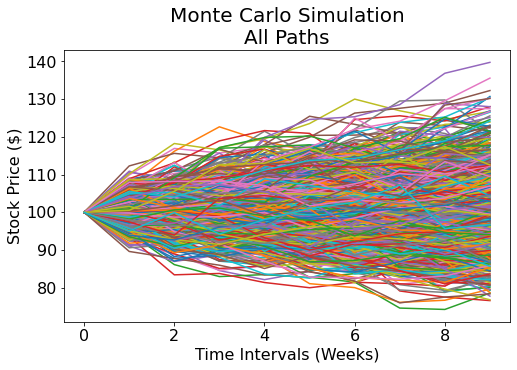

In [8]:
def price_simulations(S0, r, sigma, T, m, n):
    """
    Monte Carlo Simulation for m time increments and n different paths.
    Return a matrix of stock prices with each row as a path and each column as a time increment.
    """
    dt = T/m # Length of time increment (years)
    
    total_paths = []
    for i in range(n):
        path_i = [S0]
        for j in range(m):
            stj = path_i[-1]*np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1))
            path_i.append(stj)
        total_paths.append(path_i)
    return total_paths

# Sample Monte Carlo Simulation for Visualization Purposes
total_paths = price_simulations(S0, r, sigma, T, m, n)

# Plotting
plt.figure(figsize = (8, 5))
for i in range(n):
    ax = sns.lineplot(x = range(m+1), y = total_paths[i])
plt.title('Monte Carlo Simulation\nAll Paths', fontsize = 20)
plt.xlabel('Time Intervals (Weeks)', fontsize = 16)
plt.ylabel('Stock Price ($)', fontsize = 16)
ax.xaxis.set_tick_params(labelsize = 16)
ax.yaxis.set_tick_params(labelsize = 16)

This first visual helps us understand how the paths look in the Monte Carlo simulation. These paths are considered individually for payoff then considered all together for the final picture of the call or put valuation. The timeline should be noted as taken in weeks, 9 weeks in 2 months (rounding is involved for integer values).

The below code determines the Optimal Exercise Points for a given time. This will be used in another custom function that ties all the American Put Option pricing computation together inside a loop that will iterate for all time increments, and the Optimal Exercise Points will be stored for each time increment to create an Optimal Exercise Boundary.
Backwards induction was performed by comparing the payoff of Optimal Exercising at a future time versus exercising at a previous time increment.
Only the steps relevant to pricing were followed as the question only asked for price, not mean optimal stopping times or confidence intervals.


In [9]:
def opt_exer_bounds(S, P, K, n, thetaj_p1):
    """
    Determines the Optimal Exercise Boundary for a given time.
    Uses backwards induction to determine optimal put pricing at a given time.
    Inputs:
    S = Stock price for all paths at a given time.
    P = Put price for all paths at a given time assuming all paths will exercise in the future
        (compare with exercise today in this function)
    K = Strike price
    n = Number of paths
    thetaj_p1 = Optimal Exercise Boundary for the next time step
    """ 
    SP_pairs = [list(pair) for pair in zip(S, P)]
    previous_P = []

    put_hat = np.mean(P)
    thetaj_hat = thetaj_p1
    for i in range(n):
        if SP_pairs[i][0] <= thetaj_p1:
            put = []
            for j in range(n):
                if SP_pairs[j][0] <= SP_pairs[i][0]:
                    put.append(max(0, K-SP_pairs[j][0]))
                else:
                    put.append(SP_pairs[j][1])
            if np.mean(put) > put_hat:
                put_hat = np.mean(put)
                thetaj_hat = SP_pairs[i][0]
                previous_P = put
    if previous_P == []:
        previous_P = P

    return (previous_P, thetaj_hat)

The below function ties the other functions together to determine American Put Option pricing. It begins by performing Monte Carlo Simulation, then initializes the backwards induction process by determining the stock prices, put prices, and optimal exercise price for all paths at maturity date. Subsequently, the code performs the backward induction process by using the opt_exer_bounds function. Finally, the function plots the Optimal Exercise Boundary.

In [10]:
def MC_American_put(r, sigma, S0, K, T, m, n):
    """
    Using Monte Carlo Simulation to price an American Put Option.
    Returns the price of an American Put and plots the Optimal Exercise Boundary over time.
    """
    # Perform Monte Carlo Simulation
    total_paths = price_simulations(S0, r, sigma, T, m, n)
    
    # At maturity date
    stock_prices = [total_paths[i][-1] for i in range(n)]
    put_prices = [max(K-stock_prices[i], 0) for i in range(n)]
    thetaj = [0]*(m+1)
    thetaj[-1] = K

    # Backwards induction
    for i in range(m-1, -1, -1):
        put_prices = (np.array(put_prices)*np.exp(-r*T/m)).tolist()
        stock_prices = [row[i] for row in total_paths]
        thetaj_p1 = thetaj[i+1]
        (put_prices, thetaj[i]) = opt_exer_bounds(stock_prices, put_prices, K, n, thetaj_p1)
        
    # Plotting
    plt.figure(figsize = (10, 8))
    ax = sns.lineplot(x = range(len(thetaj)), y = thetaj)
    plt.title('Optimal Exercise Boundary', fontsize = 20)
    plt.xlabel('Time Intervals (Weeks)', fontsize = 16)
    plt.ylabel('Stock Price ($)', fontsize = 16)
    ax.xaxis.set_tick_params(labelsize = 16)
    ax.yaxis.set_tick_params(labelsize = 16)
    
    return np.mean(put_prices)

Price of an American Put Option using Monte Carlo Simulation: $ 7.07


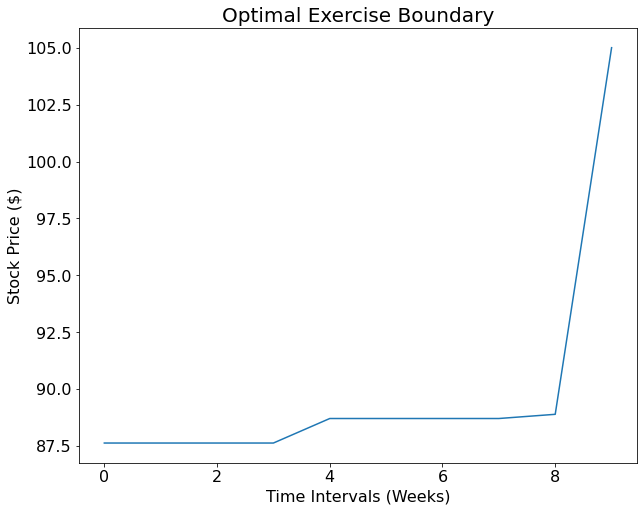

In [19]:
price = MC_American_put(r, sigma, S0, K, T, m, n)
print('Price of an American Put Option using Monte Carlo Simulation: $', np.round(price, 2)) 


This second visualization is for the optimal exercise boundary for an American put option. This shows how the best time to exercise the bond i.e., when the value of holding the bond is no longer worth it in comparison to the payoff that is possible at this point. We can see over time this boundary grows till the strike price itself, in the case of the put considered.

## Lattice Method
The Lattice method is based on the multiplicative model. At each node there are 2 paths to process every change in time increment: up or down in stock price. These prices are determined by the u and d multipliers. The multiplicative model has some advantages over an additive model, the two main advantages being superior computational efficiency compared to the additive model and the stock price being unable to drop below 0, which is a realistic restriction for the stock price.
Multipliers u and d are determined by the 2 moments of the multiplicative model, the expected value and the variance being equated to the Geometric Brownian Motion moments to allow for a discrete model to be as continuous as possible. This allows us to find the following formulas for the u and d multipliers.

u = exp(sigma * sqrt(lattice_unit_time))
d = 1/u
Where lattice_unit_time represents an individual time increment in years, and sigma represents volatility.
Using this model, we can also note that u is always greater than 1 and d is always less than 1 for the process to be executed properly. Additionally, the distance between u and d from 1 are identical.
The lattice model is primarily discrete due to the nature of its structure, as the price actions in-between each time increment are binomial.
A logical assumption to make for options pricing methods is to assume a risk-neutral world. Therefore, physical probabilities defined for classical methods of discretizing by Binomial Tree are not applicable in options pricing. To remain consistent with this assumption, the utilization of the risk-neutral probabilities fit for this scenario. The upper and lower probabilities are determined by the following formula:
p = (exp(r*lattice_unit_time)-d)/(u-d)
Where p represents the risk-neutral probability of the stock going up in the next time increment, and continuous compounding was assumed, so an exponential of Euler’s number was used in the numerator of the risk-neutral probability rather than discrete compounding assumptions.
At each fork of the lattice structure, the subsequent time increment stock values are calculated using the probability and the u and d multipliers. This process is repeated until maturity and so it is fit to use a recursive feature in this lattice model code.
Once the final stock price for each path is obtained, it is possible to compute the payoff for the option using the table indicated at the beginning of the notebook under “Pricing method for the options”. Each incremental path multiplies its previous stock price by either u or d, and also multiplies its previous probability by either p or (1-p). Both the probabilities and the stock prices are kept track of throughout the process. To compute the exotic options pricing, the payoff of each path was multiplied by their own respective probabilities and summed together to find the expected payoff of the option at the maturity date. It is then discounted at the risk-free rate to present time to find the final options price.
For the American Put pricing, the lattice method described up to this point was all applicable, but insufficient to complete the options pricing process. In order to account for the early exercise option, backwards induction was required at each time increment to determine the best time to exercise the option. Starting at the maturity date and moving backwards in time, each time increment compares the optimal payoff from a future date, discounted to the current time increment, with the option of exercising at the current time increment. Whichever gave the highest payoff became the new optimal payoff.


The binomial lattice method is done by following the lattice paths. The probabilities of the upper or lower path are determined by the risk neutral probabilities (not the physical probabilities calculated for a typical lattice) since this is an option pricing case done in a risk neutral world. The u and d scaling values at each fork are determined by the basic lattice model, which takes into account the GBM moments to allow the model to be as continuous as possible despite being discrete.
The main function follows the idea that if the time is below the maturity, then the function will call onto itself appending the time and probability for the upper and lower parts accordingly. The options are priced accordingly, where the probability for each path is taken into account.
The final wrapper function is to discount the values (continuous discounting to keep it as consistent with the previous methods) and grab the proper values for each option for output.


In [12]:
## Lattice Approach 
S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
sigma = 0.25  # volatility
r = 0.02     # risk-free rate
T = 2/12      # years to expiry

In [13]:
# Lattice Parameter Calclations
lattice_unit_time = 1/52
u = exp(sigma * sqrt(lattice_unit_time))
d = 1/u
p = (exp(r*lattice_unit_time)-d)/(u-d)# risk neutral probabilities

In [29]:
def avg(list):
    return sum(list) / len(list)

# Uses recursion to explore all possible branches of lattice, and then adds their contributions to the option values
def traverse_lattice_options(option_values, time, path, probability):
    if time > T: 
        global paths
        paths =(path[0:9])
        option_values['asian_call_value'] += max(0, avg(path) - K) * probability
        option_values['asian_put_value'] += max(0, K - avg(path)) * probability

        option_values['lookback_call_value'] += max(0, max(path) - K) * probability
        option_values['lookback_put_value'] += max(0, K - min(path)) * probability
        
        option_values['floating_lookback_call_value'] += max(0, path[-1] - min(path)) * probability
        option_values['floating_lookback_put_value'] += max(0, max(path) - path[-1]) * probability
    else: 
        path.append(path[-1] * u)
        traverse_lattice_options(option_values, time + lattice_unit_time, path, probability*p)
        path.pop()
        
        path.append(path[-1] * d)
        traverse_lattice_options(option_values, time+lattice_unit_time, path, probability*(1-p))
        path.pop()

# Wrapper function to get option values
def get_option_values():
    # Initialization
    option_values = {'asian_call_value' : 0, 
                     'asian_put_value' : 0,
                     'lookback_call_value' : 0,
                     'lookback_put_value' : 0,
                     'floating_lookback_call_value' : 0,
                     'floating_lookback_put_value' : 0}    
    
    traverse_lattice_options(option_values, 0, [S0], 1)    
    # Normalizing option cash flows by 2-month discount rate
    for option_type in option_values:        
        option_values[option_type] /= float(np.exp(-r * T))
    
    return option_values
print (get_option_values())



{'asian_call_value': 0.7384014968807882, 'asian_put_value': 5.581229467997191, 'lookback_call_value': 3.769088120139711, 'lookback_put_value': 11.52379112118663, 'floating_lookback_call_value': 6.855008070367277, 'floating_lookback_put_value': 6.813684772970307}


In [15]:
from prettytable import PrettyTable
x = PrettyTable() #random scenarios picked from the Lattice
x.field_names = ["Paths","Initial","Week 1", "Week 2", "Week 3", "Week 4","Week 5","Week 6","Week 7","Week 8","Week 9"]
x.add_row(["Path 1",100, 96.5925314187651, 93.30117125885124, 90.12196316228172, 93.30117125885124, 96.5925314187651, 100.0, 103.52767292790188, 107.17979061866627, 110.96074307650288])
x.add_row(["Path 2",100, 96.5925314187651, 93.30117125885124, 90.12196316228172, 93.30117125885124, 96.5925314187651, 93.30117125885124, 96.5925314187651, 100.0, 103.52767292790188])
x.add_row(["Path 3",100, 96.5925314187651, 93.30117125885124, 90.12196316228172, 87.05108558273488, 84.08484719187929, 87.05108558273488, 90.12196316228172, 87.05108558273488, 84.08484719187929])
print(x)

+--------+---------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+
| Paths  | Initial |      Week 1      |       Week 2      |       Week 3      |       Week 4      |       Week 5      |       Week 6      |       Week 7       |       Week 8       |       Week 9       |
+--------+---------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+
| Path 1 |   100   | 96.5925314187651 | 93.30117125885124 | 90.12196316228172 | 93.30117125885124 |  96.5925314187651 |       100.0       | 103.52767292790188 | 107.17979061866627 | 110.96074307650288 |
| Path 2 |   100   | 96.5925314187651 | 93.30117125885124 | 90.12196316228172 | 93.30117125885124 |  96.5925314187651 | 93.30117125885124 |  96.5925314187651  |       100.0        | 103.52


This table is a sample of 3 paths in the lattice randomly selected to show the process the stock price goes through over the 9-week process. Considering the initial price of $100, we can see the prices go up and down and in the end, be above, below or at the initial value. This table is a good overview of the intermediate steps the lattice goes through for the main underlying stock valuation.


### Pricing an American Put with Binomial Lattice Method



In [ ]:
def lattice_plotting(m, price_lattice):
    """
    Function to plot lattices. 
    Inputs: 
    m = number of time increments
    price_lattice = upper diagonal array of prices resembling lattice structure
    """
    fig = plt.figure(figsize=[5, 5])
    for i in range(m):
        x = [1, 0, 1]
        for j in range(i):
            x.append(0)
            x.append(1)
        x = np.array(x) + i
        y_previous = price_lattice[:i+1,i]
        y_current = price_lattice[:i+2,i+1]
        y = [cell for cell in chain.from_iterable(zip_longest(y_current, y_previous)) if cell is not None]
        plt.plot(x, y, 'bo-')


In [20]:
# Import libraries
from itertools import zip_longest, chain
from matplotlib import pyplot as plt
import numpy as np

In [21]:
# Given Parameters
r = 0.02;        # Risk-free Rate
S0 = 100;        # Current underlying stock price
sigma = 0.25;    # Volatility
K = 105;         # Strike price
T = 2/12;        # Maturity
M = 1/52;        # Lattice Unit Time
m = round(T/M);  # Number of weeks in two months


In [22]:
def Ame_put_lattice(r, S0, sigma, K, T, m):
    """
    Pricing American put options using the lattice method and backwards induction.
    Plots both stock price and put price lattices.
    Returns stock price and put price lattices in the form of arrays, and returns the put price at time 0.
    """
    # Calculate Lattice Parameters
    dt = T/m
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    p = (np.exp(r*dt)-d)/(u-d)
    
    # Initialize price and put lattices
    stock_prices = np.zeros([m+1, m+1])
    put_prices = np.zeros([m+1, m+1])
    
    # Populate the stock price lattice using u and d multiples
    for i in range(m+1):
        for j in range(i+1):
            stock_prices[j, i] = S0*(d**j)*(u**(i-j))
    
    # Put payoffs at maturity
    put_prices[:, m] = [max(0, K-stock_prices[idx, m]) for idx, row in enumerate(stock_prices)]
    
    # Populate the put price lattice using backwards induction
    for i in range(m-1, -1, -1):
        for j in range(i+1):
            exercise_later = np.exp(-r*dt)*(p*put_prices[j, i+1] + (1-p)*put_prices[j+1, i+1])
            exercise_now = max(0, K-stock_prices[j, i])
            put_prices[j, i] = max(exercise_now, exercise_later)
    
    # Plotting Stock Price Lattice
    lattice_plotting(m, stock_prices)
    plt.title('Stock Price Lattice', fontsize = 16)
    plt.xlabel('Time Intervals (Weeks)', fontsize = 12)
    plt.ylabel('Stock Price ($)', fontsize = 12)
    plt.show()
    
    # Plotting Put Price Lattice
    lattice_plotting(m, put_prices)
    plt.title('Put Price Lattice', fontsize = 16)
    plt.xlabel('Time Intervals (Weeks)', fontsize = 12)
    plt.ylabel('Put Price ($)', fontsize = 12)
    plt.show()
    
    return [np.round(stock_prices, 2), np.round(put_prices, 2), round(put_prices[0,0], 2)]

The American Put Options utilize a lattice method that compare of the value of the option when it is left unexercised, to exercising the payoff at each node. This procedure is utilized for each previous node until the root node is achieved. The maximum American put option is first calculated and then the options at maturity. After using a loop after the maximum American put option, the other remaining nodes to the left are calculated one at a time.
The equation ‘S-K’  is used in the code and calculates the option payoff immediately. ‘q * “node 11” + (1-q)* “node 12”’ calculates if we decide to get the payoff at the next node. The maximum of these values is taken as the value of the option at that node and taken to the next step. This is repeated until the root option is calculated.


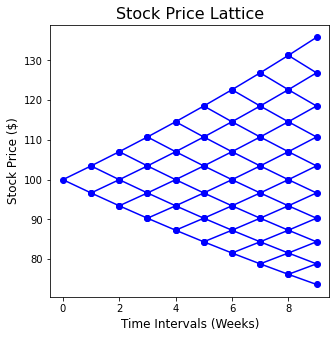

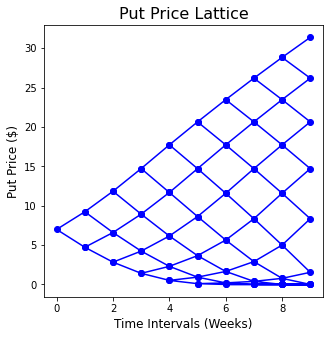

In [23]:
[stock_lattice, put_lattice, put_price] = Ame_put_lattice(r, S0, sigma, K, T, m)

The lattice plots show the lattice structure of the paths generated by the lattice based process. Time step of 1 week with 9 weeks covering 2 months is indicated and the difference in the path of stock versus a put payoff can be clearly seen between the two plots

## Comparison Between the Two Methods and Discussion
The two methods both provide a good way to price options. We see that options priced by the lattice structure are a bit different than the options priced by Monte Carlo structure. In this we have the same unit time so the normally discrete structure of the lattice method versus the more continuous structure of the Monte Carlo method aren’t too much of a concern.
The Monte Carlo method is more accurate in the sense that it is stochastic in nature, so it takes into account more of the randomness involved in the stock price. We can possibly see this as more realistic to the real world if the assumptions like Markov process being true are as well. It is able to cover the spectrum of the stock price cases well, in comparison to the lattice approach. This makes sense since at each point it is not limited to the up or down multipliers. The stochastic nature of the Monte Carlo Simulation creates uncertainty that needs to be accounted for when computing the final output. As a result, it is recommended to include a confidence interval when determining options pricing with stochastic processes.
The Lattice method is a deterministic process, which means the pricing does not change every time the program is run. This is an advantage of the lattice method but also a disadvantage. Since there is an inherent uncertainty and randomness associated with the process, the lattice structure is too basic with only 2 forks at every node and set probabilities and multipliers. This process does not cover as much of the extreme cases as the Monte Carlo method does, but the final outcomes are close and within a given interval of each other. This means that either pricing process given that the dictated assumptions hold, will work.


## Lessons Learned
The pricing of the American put in either case is very tedious and complicated due to the ability to exercise the option earlier than the maturity date. It involves optimizing the timing of when the payoff is optimal by comparing different payoff options at each time increment. The exotic options on the other hand are quite simple by comparison as there is only one option contract exercise occurrence at the maturity date. This simplifies the problem as it does not require comparisons with other exercise options to find the optimal.
The Monte Carlo method is very intuitive but needs a large number of computations to be considered ‘accurate’ to a certain degree. As a result, a large number of paths with a large number of time steps is required to ensure that the process is as close to continuous as possible. This is especially the case in pricing American put options as many Monte Carlo Simulation paths with infinitesimally small time-increments are required to achieve convergence, which ends up resulting in a feasible and consistent Optimal Exercise Boundary. Challenges with attempting to create Monte Carlo Simulations with a large number of paths and time steps involve lack of memory and high computational time and effort. This trade-off between accuracy and computational time needs to be considered. In computing the American put option using Monte Carlo Simulation for this particular project, it was observed that because the time increments were 1 week in length, and there were only 9 total increments until maturity, the plot of the Optimal Exercise Boundary was inconsistent and fragmented with many noticeable kinks.
